# Deep Learning for Image Classification

the proposed model aims to train and classify optical coherence tomography angiography (OCT) retinal images into 3 classes - NORMAL, age-related macular degeneration and diabetic retinopathy.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# **PART I** - Classfication with Convolutional Neural Network (ConvNet/CNN) 

In [ ]:


import os 
from google.colab import drive
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator , load_img
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import zipfile
import cv2
from skimage import io
import tensorflow as tf
from tensorflow.python.keras import Sequential
from tensorflow.keras import layers, optimizers
from tensorflow.keras.applications import DenseNet121
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.layers import *
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping, ModelCheckpoint, LearningRateScheduler
from IPython.display import display
from tensorflow.keras import backend as K
from sklearn.preprocessing import StandardScaler, normalize
import glob
import random
from sklearn.metrics import classification_report
from tensorflow.keras.models import model_from_json

%matplotlib inline

In [ ]:
drive.mount('/content/drive')

KeyboardInterrupt: ignored

## Step 2: Labeling the images according to prior knowledge (supervised learning) to train the model

In [ ]:
labeling_job = ImageDataGenerator(rescale=1./255)

In [ ]:
train_label = labeling_job.flow_from_directory('/content/drive/My Drive/images/training',\
                                               target_size=(260,260),batch_size=32)

validation_label = labeling_job.flow_from_directory('/content/drive/My Drive/images/validation',\
                                                    target_size=(260,260),batch_size=32, \
                                                    classes=train_label.class_indices)

test_label = labeling_job.flow_from_directory('/content/drive/My Drive/images/testing',
                                              target_size=(260,260),batch_size=32, \
                                              classes=train_label.class_indices)

Found 264 images belonging to 3 classes.
Found 30 images belonging to 3 classes.
Found 74 images belonging to 3 classes.


In [ ]:
train_label.class_indices 

{'AMD': 0, 'DR': 1, 'Normal': 2}

In [ ]:
validation_label.class_indices 

{'AMD': 0, 'DR': 1, 'Normal': 2}

In [ ]:
test_label.class_indices 

{'AMD': 0, 'DR': 1, 'Normal': 2}

## Step 3: Building CNN with Tensorflow Keras

In [ ]:
Model  = Sequential()

Model.add(Conv2D(32,(3,3),input_shape =(260,260,3)))

Model.add(MaxPool2D((3,3)))

for i in range(6,9):
  Model.add(Conv2D(2**i,(3,3)))
  Model.add(MaxPool2D((3,3)))

Model.add(MaxPool2D((2,2)))

Model.add(Flatten())

Model.add(Dense(train_label.num_classes,activation='softmax'))

In [ ]:
Model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 258, 258, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 86, 86, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 84, 84, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 26, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 128)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 6, 6, 256)         2

In [ ]:
Model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

In [ ]:
Model.fit(train_label,epochs=20, validation_data= validation_label)

Epoch 1/20
9/9 [==============================] - 101s 8s/step - loss: 1.0827 - accuracy: 0.4058 - val_loss: 1.0169 - val_accuracy: 0.3000
Epoch 2/20
9/9 [==============================] - 2s 285ms/step - loss: 1.0012 - accuracy: 0.4857 - val_loss: 0.8855 - val_accuracy: 0.5333
Epoch 3/20
9/9 [==============================] - 2s 260ms/step - loss: 0.8746 - accuracy: 0.5662 - val_loss: 0.7098 - val_accuracy: 0.5333
Epoch 4/20
9/9 [==============================] - 2s 264ms/step - loss: 0.6688 - accuracy: 0.6385 - val_loss: 0.4236 - val_accuracy: 0.8000
Epoch 5/20
9/9 [==============================] - 2s 258ms/step - loss: 0.3921 - accuracy: 0.8412 - val_loss: 0.1939 - val_accuracy: 0.8667
Epoch 6/20
9/9 [==============================] - 2s 260ms/step - loss: 0.2068 - accuracy: 0.9373 - val_loss: 0.2384 - val_accuracy: 0.9333
Epoch 7/20
9/9 [==============================] - 2s 260ms/step - loss: 0.2329 - accuracy: 0.9087 - val_loss: 0.0622 - val_accuracy: 1.0000
Epoch 8/20
9/9 [=====

## Step 4: Test Unseen Images


Correct class for image Normal
Predicted class is Normal


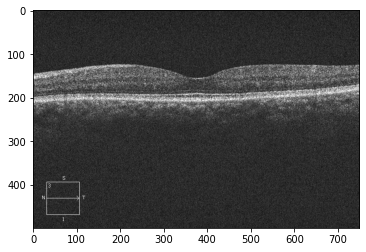

Correct class for image Normal
Predicted class is Normal


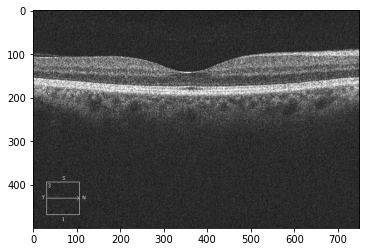

Correct class for image Normal
Predicted class is Normal


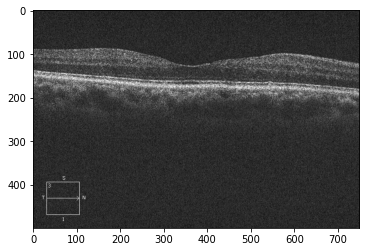

Correct class for image Normal
Predicted class is Normal


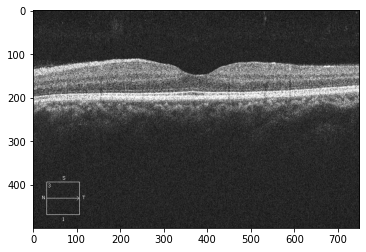

Correct class for image Normal
Predicted class is Normal


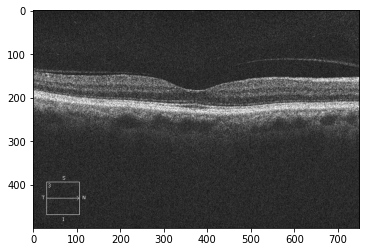

Correct class for image Normal
Predicted class is Normal


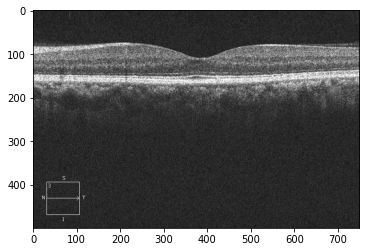

Correct class for image Normal
Predicted class is Normal


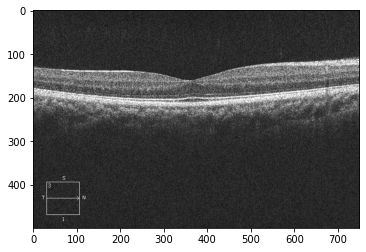

Correct class for image Normal
Predicted class is Normal


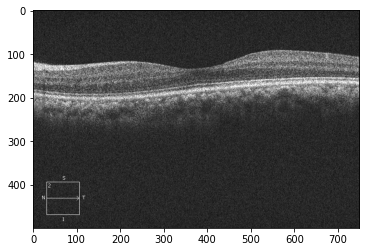

Correct class for image Normal
Predicted class is Normal


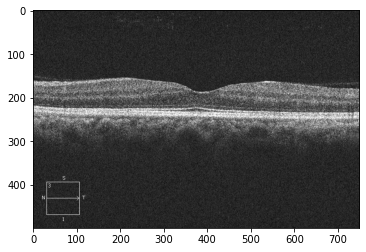

Correct class for image Normal
Predicted class is Normal


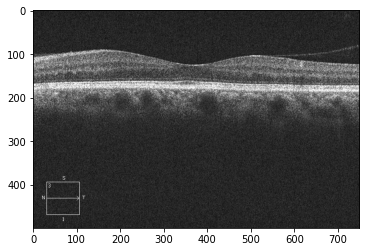

Correct class for image Normal
Predicted class is Normal


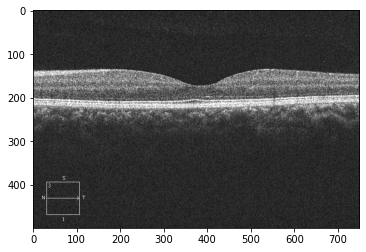

Correct class for image Normal
Predicted class is Normal


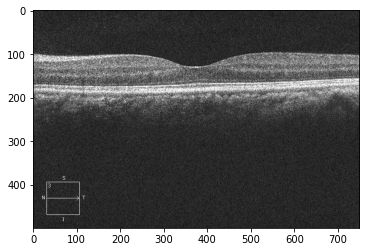

Correct class for image Normal
Predicted class is Normal


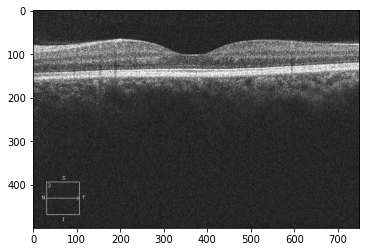

Correct class for image Normal
Predicted class is Normal


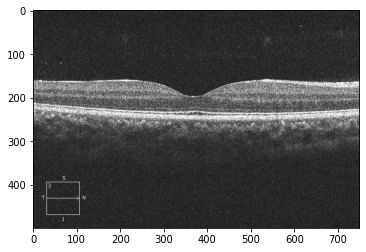

Correct class for image Normal
Predicted class is Normal


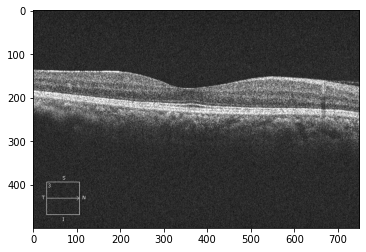

Correct class for image Normal
Predicted class is Normal


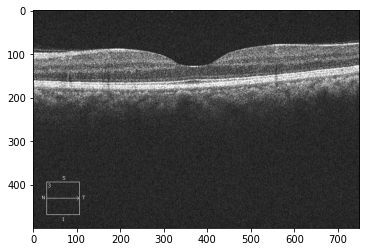

Correct class for image Normal
Predicted class is Normal


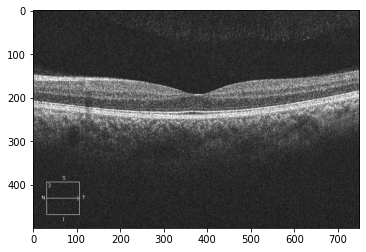

Correct class for image Normal
Predicted class is Normal


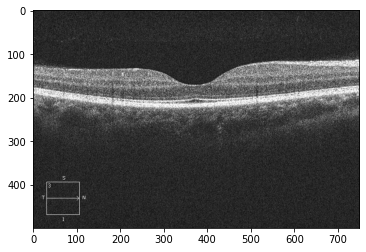

Correct class for image Normal
Predicted class is Normal


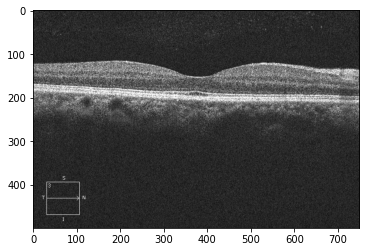

Correct class for image Normal
Predicted class is Normal


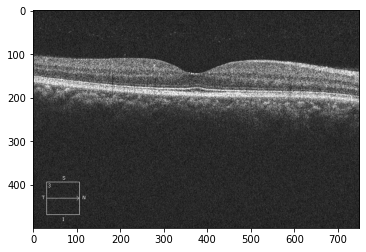

Correct class for image Normal
Predicted class is Normal


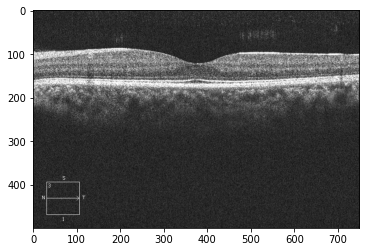

Correct class for image Normal
Predicted class is Normal


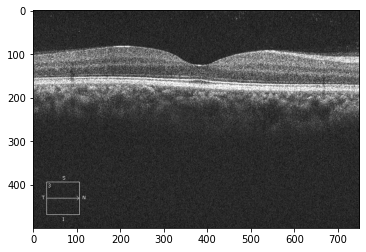

Correct class for image Normal
Predicted class is Normal


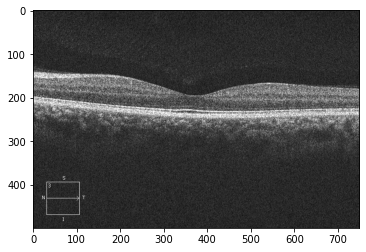

Correct class for image Normal
Predicted class is Normal


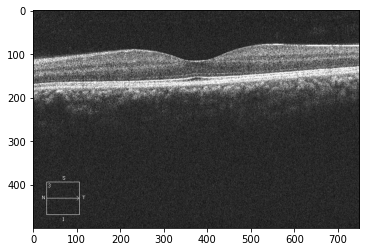

Correct class for image Normal
Predicted class is Normal


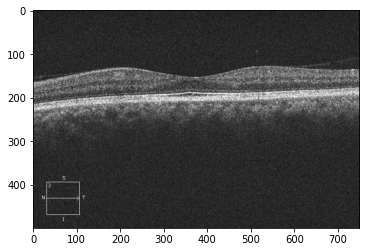

Correct class for image Normal
Predicted class is Normal


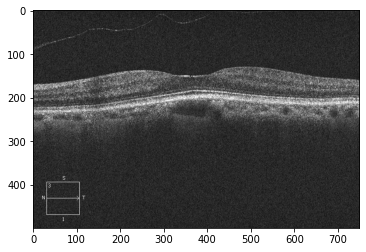

Correct class for image Normal
Predicted class is Normal


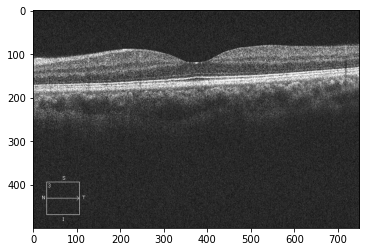

Correct class for image Normal
Predicted class is Normal


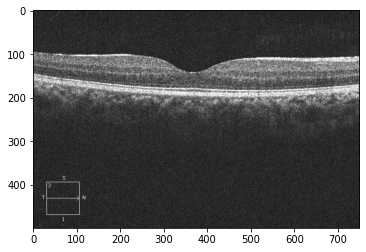

Correct class for image Normal
Predicted class is Normal


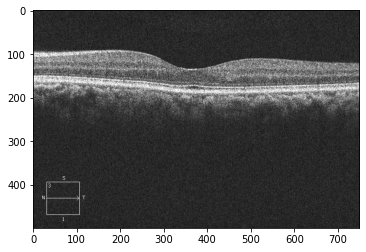

Correct class for image Normal
Predicted class is Normal


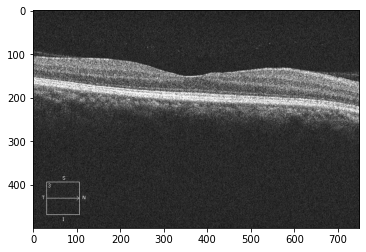

Correct class for image Normal
Predicted class is Normal


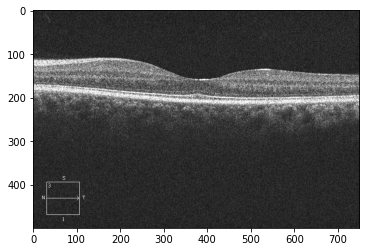

Correct class for image Normal
Predicted class is Normal


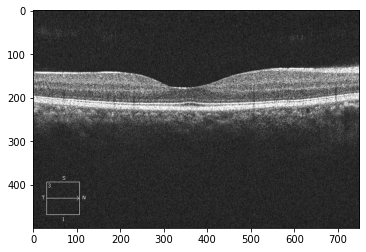

Correct class for image Normal
Predicted class is Normal


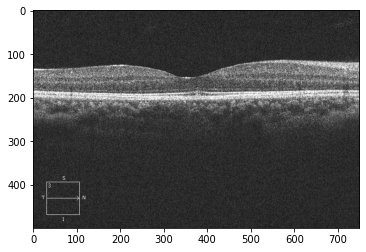

Correct class for image Normal
Predicted class is Normal


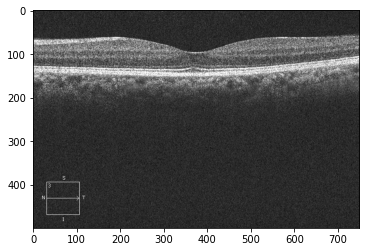

Correct class for image Normal
Predicted class is Normal


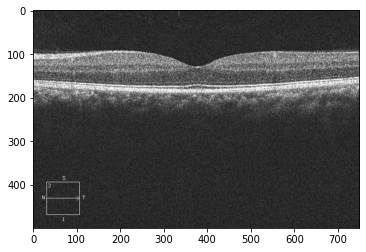

Correct class for image Normal
Predicted class is Normal


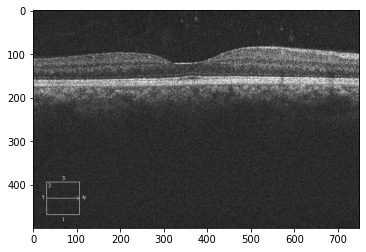

Correct class for image Normal
Predicted class is Normal


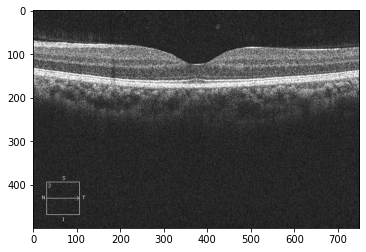

Correct class for image Normal
Predicted class is Normal


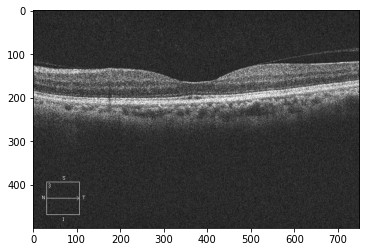

Correct class for image Normal
Predicted class is Normal


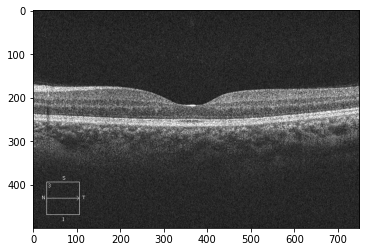

Correct class for image Normal
Predicted class is Normal


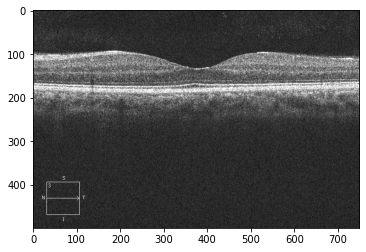

Correct class for image Normal
Predicted class is Normal


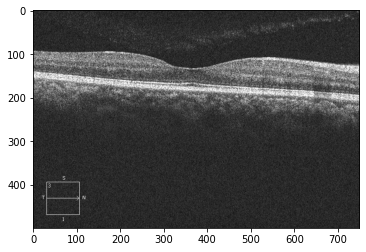

Correct class for image Normal
Predicted class is Normal


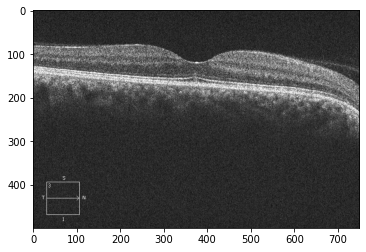

Correct class for image DR
Predicted class is DR


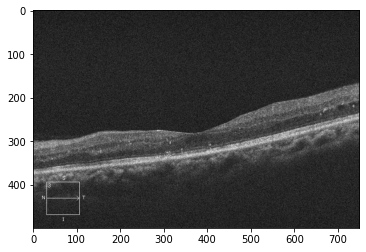

Correct class for image DR
Predicted class is DR


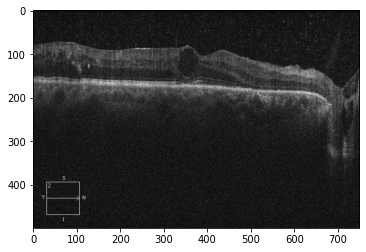

Correct class for image DR
Predicted class is DR


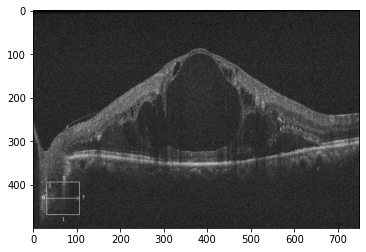

Correct class for image DR
Predicted class is AMD


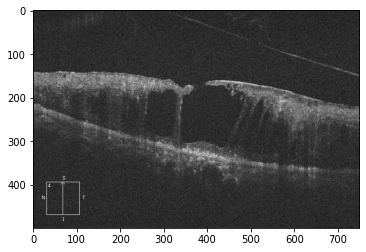

Correct class for image DR
Predicted class is AMD


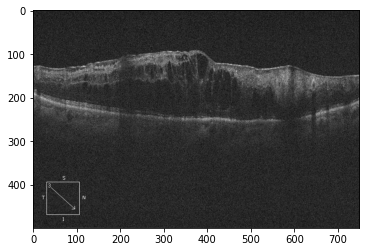

Correct class for image DR
Predicted class is DR


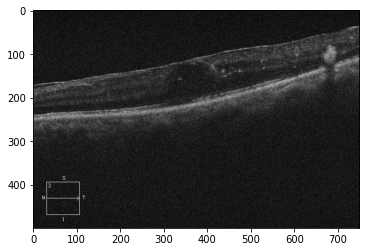

Correct class for image DR
Predicted class is DR


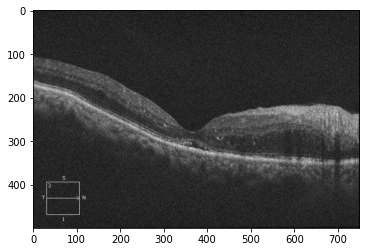

Correct class for image DR
Predicted class is AMD


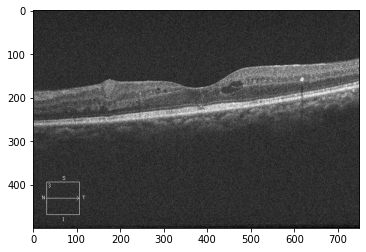

Correct class for image DR
Predicted class is DR


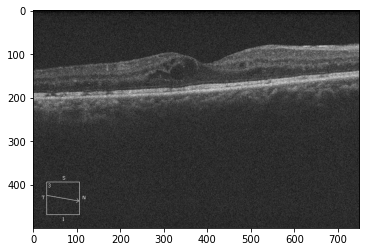

Correct class for image DR
Predicted class is DR


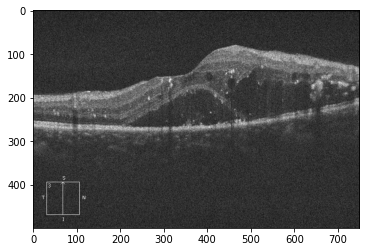

Correct class for image DR
Predicted class is Normal


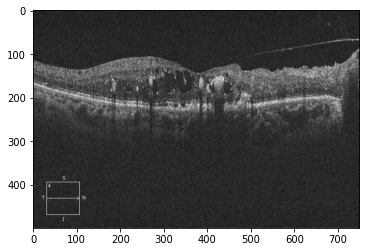

Correct class for image DR
Predicted class is DR


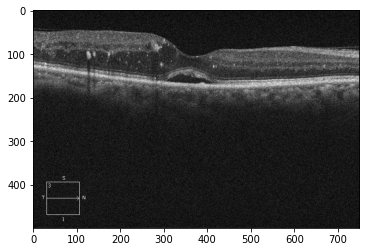

Correct class for image DR
Predicted class is AMD


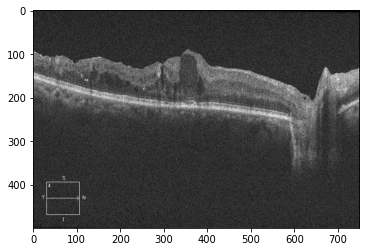

Correct class for image DR
Predicted class is DR


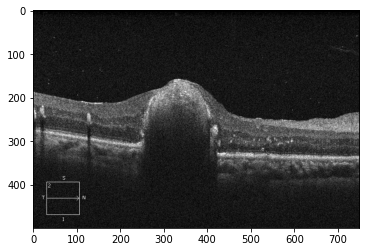

Correct class for image DR
Predicted class is AMD


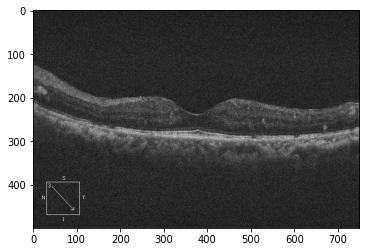

Correct class for image DR
Predicted class is DR


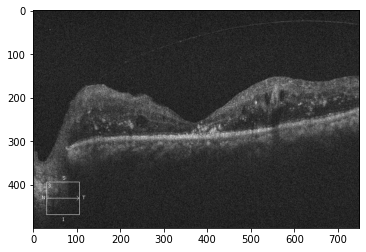

Correct class for image DR
Predicted class is AMD


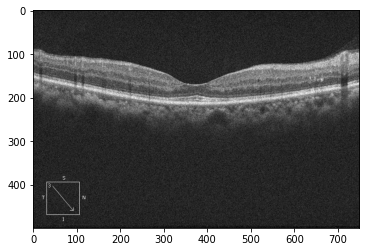

Correct class for image DR
Predicted class is DR


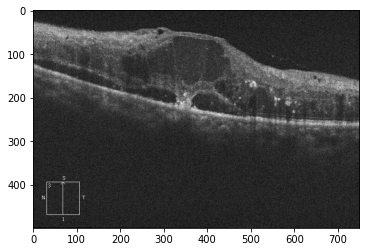

Correct class for image DR
Predicted class is AMD


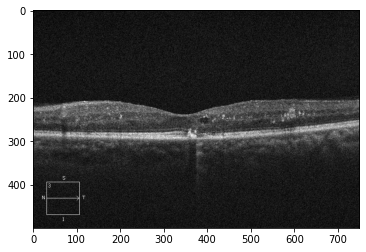

Correct class for image DR
Predicted class is AMD


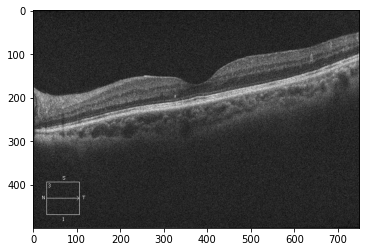

Correct class for image DR
Predicted class is DR


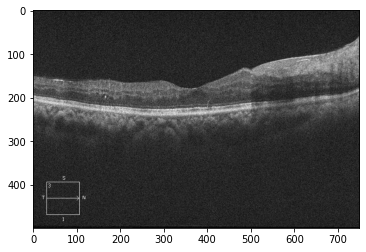

Correct class for image AMD
Predicted class is AMD


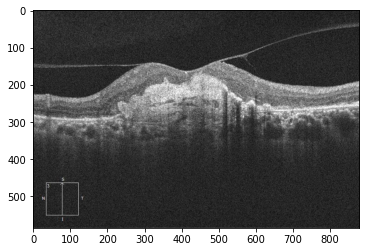

Correct class for image AMD
Predicted class is AMD


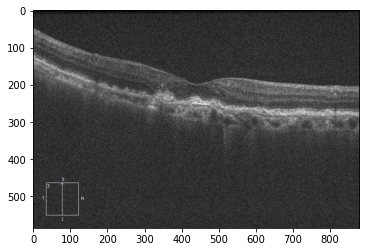

Correct class for image AMD
Predicted class is Normal


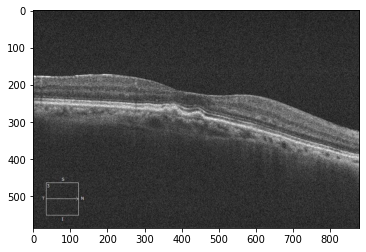

Correct class for image AMD
Predicted class is AMD


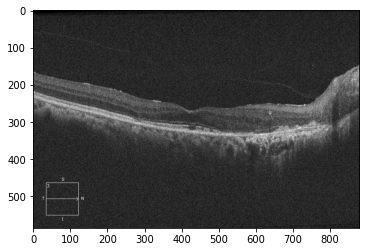

Correct class for image AMD
Predicted class is AMD


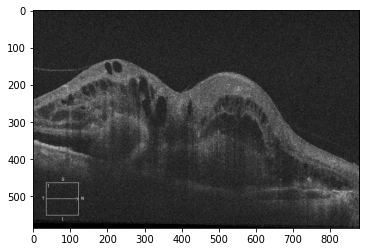

Correct class for image AMD
Predicted class is AMD


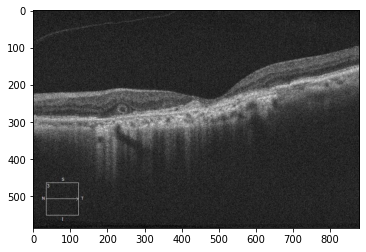

Correct class for image AMD
Predicted class is AMD


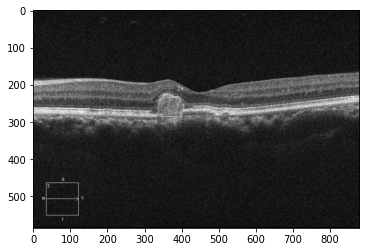

Correct class for image AMD
Predicted class is AMD


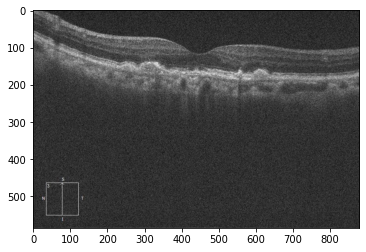

Correct class for image AMD
Predicted class is AMD


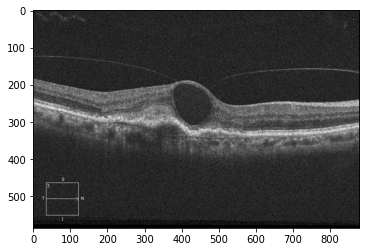

Correct class for image AMD
Predicted class is AMD


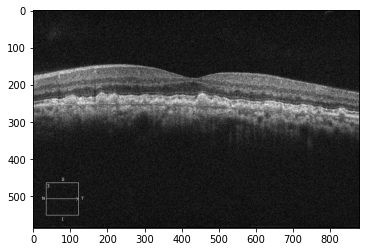

Correct class for image AMD
Predicted class is AMD


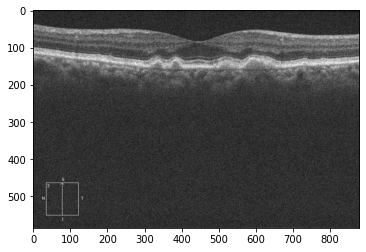

In [ ]:
testing_path = '/content/drive/My Drive/images/testing'

Y_pred= []
Y_act = []

for i in os.listdir(testing_path):
  for j in os.listdir(os.path.join(testing_path,i)):
    my_img = load_img(os.path.join(testing_path,i,j))
    x = np.expand_dims(my_img.resize((260,260)),axis=0)
    y= Model.predict(x)
    y_class = y.argmax()
    Y_pred.append(y_class)
    Y_act.append(i)

    plt.imshow(my_img)
    print('Correct class for image {}'.format(i))
    print('Predicted class is {}'.format(list(train_label.class_indices.keys())[y_class]))
    plt.show()

In [ ]:
pred_list = [list(train_label.class_indices.keys())[i] for i in Y_pred] 
act_list = Y_act

## Step 5: Evaluate the Model

In [ ]:
out_df =pd.DataFrame(np.vstack([pred_list,act_list]).T,\
                     columns=['predicted_class','actual_class'])

In [ ]:
confusion_matrix = pd.crosstab(out_df['actual_class'],\
                               out_df['predicted_class'],\
                               rownames=['Actual'], \
                               colnames=['Predicted'])

In [ ]:
confusion_matrix

Predicted  AMD  DR  Normal
Actual                    
AMD         10   0       1
DR           8  12       1
Normal       0   0      42

test accuracy : 86.49%


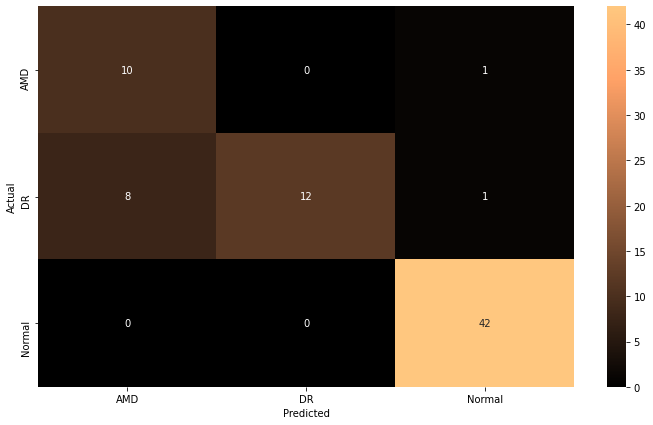

In [ ]:
#  confuston matrix
plt.figure(figsize=(12,7))
sns.heatmap(confusion_matrix,cmap= 'copper',annot = True,fmt= 'd')
print('test accuracy : {:.2f}%'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

**The digonal line represents all the correctly classified labels. The number above or below the digonal line are misclassified labels.**




In [ ]:
print(classification_report(pred_list, act_list, target_names=train_label.class_indices))

              precision    recall  f1-score   support

         AMD       0.91      0.56      0.69        18
          DR       0.57      1.00      0.73        12
      Normal       1.00      0.95      0.98        44

    accuracy                           0.86        74
   macro avg       0.83      0.84      0.80        74
weighted avg       0.91      0.86      0.87        74



 **Recall** is selected as the performance metrics as calssificiation between  normal retinas and retinas with disease is the objective.

Recall is used to select the best model when there is a high cost associated with **False Negative.** 

The weighted recall score for this CNN model is **86%**. (1st trial)

For **'weighted':**
Calculate metrics for each label, and find their average weighted by support (the number of true instances for each label). 

In [ ]:

model_json = Model.to_json()

with open("/content/drive/My Drive/images/saved_model.json", "w") as json_file:
    json_file.write(model_json)


Model.save_weights("/content/drive/My Drive/images/saved_model.h5")
print("Saved model to disk")

# PART II - Classification with ResNet


 ResNet 

• As CNNs grow deeper, vanishing gradient tend to occur which negatively impacts network performance.   
  
• Residual Neural Network includes “skip     connection” feature which enables training of 152 layers without vanishing gradient issues.    
  
• ImageNet contains 11 million images and 11,000 categories.  
  
• ImageNet is used to train ResNet deep network.      

## Step 1: Label the images 

In [ ]:
from tensorflow.keras.layers import Conv2D,Flatten,Dense,MaxPool2D,BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
img_height, img_width = (224,224)
batch_size = 32

train_data_dir = r"/content/drive/My Drive/images/training"
valid_data_dir = r"/content/drive/My Drive/images/validation"
test_data_dir  = r"/content/drive/My Drive/images/testing"

In [ ]:
datagen = ImageDataGenerator(preprocessing_function=preprocess_input,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

In [ ]:
train_generator = datagen.flow_from_directory(
    train_data_dir,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') 


valid_generator = datagen.flow_from_directory(
    valid_data_dir, 
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical')

Found 264 images belonging to 3 classes.
Found 30 images belonging to 3 classes.


In [ ]:
test_generator = datagen.flow_from_directory(
    test_data_dir, 
    target_size=(img_height, img_width),
    batch_size=1,
    class_mode='categorical')

Found 74 images belonging to 3 classes.


In [ ]:
valid_generator.class_indices 

{'AMD': 0, 'DR': 1, 'Normal': 2}

In [ ]:
 valid_generator.num_classes 

3

In [ ]:
x,y = test_generator.next() 
x.shape

(1, 224, 224, 3)

## Step 2: Build ResNet Model

In [ ]:
base_model = ResNet50(include_top=False, weights='imagenet')
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(train_generator.num_classes, activation='softmax')(x)
res_model = Model(base_model.input, predictions)

for layer in base_model.layers:
    layer.trainable = False
    
res_model.compile(loss='categorical_crossentropy',optimizer='rmsprop', metrics=['accuracy'])
res_model.fit(train_generator, epochs = 10)

94773248/94765736 [==============================] - 0s 0us/step
Epoch 1/10
9/9 [==============================] - 7s 455ms/step - loss: 8.1340 - accuracy: 0.4496
Epoch 2/10
9/9 [==============================] - 4s 469ms/step - loss: 0.6932 - accuracy: 0.8286
Epoch 3/10
9/9 [==============================] - 4s 469ms/step - loss: 0.6058 - accuracy: 0.8240
Epoch 4/10
9/9 [==============================] - 4s 469ms/step - loss: 0.9192 - accuracy: 0.8589
Epoch 5/10
9/9 [==============================] - 4s 462ms/step - loss: 0.2070 - accuracy: 0.9676
Epoch 6/10
9/9 [==============================] - 4s 514ms/step - loss: 0.3997 - accuracy: 0.9198
Epoch 7/10
9/9 [==============================] - 4s 514ms/step - loss: 0.5265 - accuracy: 0.9033
Epoch 8/10
9/9 [==============================] - 4s 464ms/step - loss: 0.4136 - accuracy: 0.9001
Epoch 9/10
9/9 [==============================] - 4s 464ms/step - loss: 0.3762 - accuracy: 0.8880
Epoch 10/10
9/9 [==============================] - 4s

In [ ]:
res_model.save('/content/drive/My Drive/images/ResNet50_retina.h5' )

In [ ]:
test_loss, test_acc = res_model.evaluate(test_generator, verbose=2)
print('\nTest accuracy:', test_acc)

74/74 - 2s - loss: 0.1049 - accuracy: 0.9595

Test accuracy: 0.9594594836235046


## Step 3: Test Unseen Images

In [ ]:
res_model = tf.keras.models.load_model("/content/drive/My Drive/images/ResNet50_retina.h5")

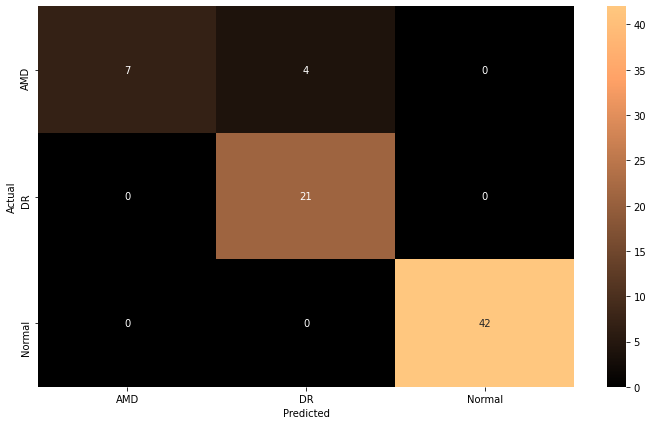

test accuracy : 94.59%


In [ ]:
filenames = test_generator.filenames
nb_samples = len(test_generator)

plt.figure(figsize=(12,7))
y_prob=[]
y_act=[]
test_generator.reset()
for _ in range(nb_samples):
  X_test,Y_test = test_generator.next()
  y_prob.append(res_model.predict(X_test))
  y_act.append(Y_test)

predicted_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_prob]
actual_class = [list(train_generator.class_indices.keys())[i.argmax()] for i in y_act]


out_df = pd.DataFrame(np.vstack([predicted_class,actual_class]).T,columns=['predicted_class','actual_class'])
confusion_matrix = pd.crosstab(out_df['actual_class'],out_df['predicted_class'], rownames=['Actual'], colnames=['Predicted'])

sns.heatmap(confusion_matrix,cmap='copper', annot=True,fmt='d')
plt.show()
print('test accuracy : {:.2f}%'.format((np.diagonal(confusion_matrix).sum()/confusion_matrix.sum().sum()*100)))

## Step 4: Evaluate Model Performance

In [ ]:
print(classification_report(predicted_class, actual_class, target_names=train_generator.class_indices))

              precision    recall  f1-score   support

         AMD       0.64      1.00      0.78         7
          DR       1.00      0.84      0.91        25
      Normal       1.00      1.00      1.00        42

    accuracy                           0.95        74
   macro avg       0.88      0.95      0.90        74
weighted avg       0.97      0.95      0.95        74



Using ResNet, **weighted average recall score of 95%** was achieved